<br> 
<body>
<p style='font-size:50px;text-align:center;color:#0000C6'> Analyses of the GaitPhase Database PPMI<p> 
<center><img src="images/phases_gait.jpg"></center>
<p style='font-size:15px;text-align:center'>Decomposition of the different phase of walking</p>
</body>

<br>
<p style='font-size:30px; color:Red'> TODOLIST </p>

---

- Régler pb cohort = 3 voir a quoi correspondes 1/3 dans fichier

---
<p style='font-

---
**Data** : Motor features extracted from the raw accelerometer and gyroscope signals are presented in the tables below.
<img src = 'image/features.jpg'/>

**Authors** : Anat Mirelman, PhD, Tel Aviv Medcial Center, Tel Aviv University

**Data PPMI access** : https://ida.loni.usc.edu/pages/access/studyData.jsp?categoryId=3&subCategoryId=4

---
<font color='red'>I WILL WORK ON IT HERE</font>

Les données issues des évaluations de la marche dans chaque site sont enregistrées sur un ordinateur désigné sur le site et sont ensuite transférées dans une base de données centrale de la TASMC (Tel Aviv Sourasky Medical Center) pour être traitées. 

Une fois reçues, l'ingénieur de TASMC examine les données pour en vérifier la qualité et l'intégrité et les traite pour extraire les caractéristiques des signaux bruts de l'accéléromètre et du gyroscope à l'aide d'algorithmes validés. Les données sont ensuite vérifiées à nouveau pour s'assurer de leur qualité et de leur précision.

L'équipe du TASMC a travaillé avec le CTCC pour créer une légende de données et une infrastructure pour le transfert des données sur le site Web du PPMI (LONI) en tant que données en libre accès (voir le tableau ci-dessous). 

Tous les sujets conservent leur numéro d'identification unique PPMI, ce qui permet de combiner les données sur la démarche avec d'autres informations recueillies dans le cadre de PPMI.

---

<p style='font-size:30px;text-align:center;color:#00CCDC'> Data Cleaning<p>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# import data for a first visualisation
data = pd.read_csv('../Motor___MDS-UPDRS/Gait_Data___Arm_swing.csv')
data.head()

,PATNO,EVENT_ID,INFODT,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,V06,11/2018,1.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,V04,11/2017,1.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,V06,10/2018,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,V06,12/2018,1.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,42426,BL,11/2016,1.0,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053


<p style='font-size:15px;color:green'>MERGE CSV : FOCUS ON CLASSIFICATION PD AND HC</p>

In [3]:
# df_first = merge of all csv sheets from Analytic Datasets
file = '../Quick_Start/Consensus_Committee_Analytic_Datasets_28OCT21.xlsx'

df1 = pd.read_excel(file,'PD')
df2 = pd.read_excel(file, 'HC')
df3 = pd.read_excel(file, 'Prodromal')
df4 = pd.read_excel(file, 'SWEDD')

df = pd.concat([df1, df2, df3, df4])

df_first = df.sort_values(['PATNO'])
df_first = df_first.set_index('PATNO')

#df_arm file analyzed
file_arm = "../Motor___MDS-UPDRS/Gait_Data___Arm_swing.csv"
df_arm = pd.read_csv(file_arm)


df_first.head(10)

,Cohort,Subgroup,ENRLPD,ENRLPROD,ENRLLRRK2,ENRLGBA,ENRLSNCA,Unnamed: 8,CONPD,CONPROD,...,Unnamed: 9,CONHPSM,CONRBD,PHENOCNV,DIAG1,DIAG1VIS,DIAG2,DIAG2VIS,ENRLSWEDD,CONSWEDD
PATNO,,,,,,,,,,,,,,,,,,,,,
3000,Healthy Control,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,Parkinson's Disease,Sporadic,1.0,0.0,0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002,Parkinson's Disease,Sporadic,1.0,0.0,0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3003,Parkinson's Disease,Sporadic,1.0,0.0,0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,Healthy Control,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3006,Parkinson's Disease,Sporadic,1.0,0.0,0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3007,Parkinson's Disease,Sporadic,1.0,0.0,0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3008,Healthy Control,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3009,Healthy Control,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Search
df_first.loc[40621,['Cohort','Subgroup','Comments']]

Cohort      Prodromal
Subgroup      Genetic
Comments          NaN
Name: 40621, dtype: object

In [5]:
# Display multiple table from stack overflow

from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    

---
#### Visualization of number in each cohort in total PPMI base

<ipython-input-6-384d47433d9e>:11: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(size, explode=explode, labels=names, autopct='%1.1f%%', startangle=90)


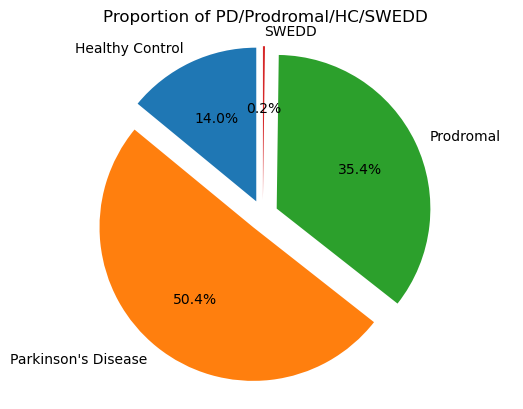

In [6]:
# Visualization of number in each cohort in total PPMI base
names = np.unique(df_first['Cohort'])
size = np.divide([np.count_nonzero(df_first['Cohort']=='Healthy Control'),
                  np.count_nonzero(df_first['Cohort'] == "Parkinson's Disease"),
                 np.count_nonzero(df_first['Cohort'] == "Prodromal"),
                 np.count_nonzero(df_first['Cohort'] == "SWEDD")], np.shape(df_first)[0])

# See pie chart
fig, ax = plt.subplots()
explode = (0.1, 0.1, 0.1, 0.1)
ax.pie(size, explode=explode, labels=names, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proportion of PD/Prodromal/HC/SWEDD', color = 'Black')
plt.tight_layout
plt.show()


---
#### A quoi correpsondent n°1/3 de cohort dans fichier ?

In [6]:
# Visualization of number in cohort=1 in arm swing analyse base

# Filter
cohort_mask = (df_arm.COHORT==1)
col_mask = ['PATNO', 'COHORT']
df_armsort = df_arm.loc[cohort_mask,col_mask]

# Delete duplicates
#df_armsort.drop_duplicates(subset=['PATNO'], keep='first', inplace =True)

# Search corresponding cohort annotation
pat_mask = list(df_armsort.PATNO)
df_corresp = df_first.loc[pat_mask,['Cohort']]

In [7]:
# Visualization of number in cohort = 3 in arm swing analyse base

# Filter
cohort_mask = (df_arm.COHORT==3)
col_mask = ['PATNO', 'COHORT']
df_armsort3 = df_arm.loc[cohort_mask, col_mask]

# Delete duplicates
#df_armsort3.drop_duplicates(subset=['PATNO'], keep='first', inplace =True)

# Search corresponding cohort annotation
pat_mask = list(df_armsort3.PATNO)
for i in pat_mask:
    try:
        print(df_first.loc[i, ['Cohort']])
    except:
        print('Pas de numéro {} dans la base de donnée'.format(i))

# Error no number 42035?! even on the site not found
pat_mask.remove(42035)
df_corresp3 = df_first.loc[pat_mask, ['Cohort']]
df_armsort3 = df_armsort3.set_index('PATNO')

Cohort    Parkinson's Disease
Name: 42438, dtype: object
Cohort    Parkinson's Disease
Name: 42418, dtype: object
Cohort    Parkinson's Disease
Name: 42418, dtype: object
Cohort    Parkinson's Disease
Name: 42415, dtype: object
Cohort    Parkinson's Disease
Name: 42357, dtype: object
Cohort    Parkinson's Disease
Name: 42415, dtype: object
Cohort    Parkinson's Disease
Name: 42351, dtype: object
Cohort    Parkinson's Disease
Name: 42351, dtype: object
Cohort    Parkinson's Disease
Name: 42346, dtype: object
Cohort    Parkinson's Disease
Name: 42346, dtype: object
Cohort    Parkinson's Disease
Name: 42346, dtype: object
Cohort    Parkinson's Disease
Name: 42308, dtype: object
Cohort    Parkinson's Disease
Name: 42308, dtype: object
Cohort    Parkinson's Disease
Name: 42308, dtype: object
Cohort    Parkinson's Disease
Name: 41375, dtype: object
Cohort    Parkinson's Disease
Name: 41375, dtype: object
Cohort    Parkinson's Disease
Name: 41356, dtype: object
Cohort    Parkinson's Disease
N

In [8]:
# Display
print(df_armsort.shape, df_armsort3.shape)
display_side_by_side(df_armsort, df_corresp, df_armsort3, df_corresp3, titles=['Arm cohort1', 'Corresponding disease', 'Arm cohort3', 'Corresponding disease'])

(74, 2) (93, 1)


,PATNO,COHORT
0,42443,1.0
1,42443,1.0
3,42426,1.0
4,42426,1.0
5,42422,1.0
6,42422,1.0
12,42357,1.0
24,41364,1.0
25,41364,1.0
28,41343,1.0


---
#### <font color='DarkOrange'>Conclusion</font>

The **cohort 1** on the document corresponds to people in the **Prodromal stage** of Parkinson's disease (the stage at which individuals do not fulfill diagnostic criteria for PD ie, bradykinesia and at least 1 other motor sign)

The **cohort 3** to patients with **PD**

*PS : The exceptions of miss-classification are justified in the csv with a column named 'Comments'*

---

##### Attribution of Nan to the right cohort


In [8]:
# Get the PATNO of the unknown cohort
df_na_arm = df_arm.loc[df_arm['COHORT'].isna(),['PATNO']]
# Get their cohort
df_complete = df_first.loc[df_na_arm['PATNO'],['Cohort']].replace(['Prodromal',"Parkinson's Disease"],[1,3])
#Replace Nan in df_arm['COHORT']
df_arm.loc[df_arm.COHORT.isnull(), 'COHORT'] = list(df_complete['Cohort'])

df_arm.head(50)

,PATNO,EVENT_ID,INFODT,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,V06,11/2018,1.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,V04,11/2017,1.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,V06,10/2018,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,V06,12/2018,1.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,42426,BL,11/2016,1.0,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053
5,42422,V06,12/2018,1.0,1.563,61.052068,51.465144,18.543469,11.587096,0.207511,...,0.585938,1.296875,0.615345,1.256410,9.398438,10.333984,0.578125,1.128906,0.639181,1.080505
6,42422,BL,11/2016,1.0,1.143,38.314673,33.248165,7.560887,8.128498,0.168624,...,0.625000,1.437500,0.381887,0.737591,7.562500,6.070312,0.609375,1.269531,0.491730,0.733162
7,42418,V04,03/2018,3.0,1.042,22.526788,43.909882,8.733026,6.224986,0.479479,...,0.625000,2.820312,0.411788,1.137831,13.687500,12.632812,0.609375,2.761719,0.656651,1.349639
8,40621,NaN,12/2017,1.0,1.500,51.613331,37.382977,2.566866,3.752649,0.383879,...,0.625000,2.507812,0.503161,0.854427,9.640625,7.667969,0.656250,2.210938,0.762715,1.158379
9,42418,BL,02/2017,3.0,0.964,15.610665,36.560067,4.258304,3.149224,0.569155,...,0.617188,2.472656,0.527426,2.056776,11.101562,8.835938,0.585938,2.457031,0.484080,1.557265


In [9]:
# remplace v8 et V8 par V08 idem V2 v6 V10 v10 v11
df_arm["EVENT_ID"].iloc[np.where(df_arm["EVENT_ID"]=='v8')]='V08'
df_arm["EVENT_ID"].iloc[np.where(df_arm["EVENT_ID"]=='V8')]='V08'
df_arm["EVENT_ID"].iloc[np.where(df_arm["EVENT_ID"]=='V2')]='V02'
df_arm["EVENT_ID"].iloc[np.where(df_arm["EVENT_ID"]=='v6')]='V06'
df_arm["EVENT_ID"].iloc[np.where(df_arm["EVENT_ID"]=='v10')]='V10'
df_arm["EVENT_ID"].iloc[np.where(df_arm["EVENT_ID"]=='v11')]='V11'

/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


---
#### <p style='font-size:25px;text-align:center;color:Blue'>Quelques statistiques :<p>

Nombre de personnes testées : 192 et récupération de 56 mesures
Nombre de Prodromal : (1, 96)
Nombre de personnes ayant Parkinson : (1, 96)


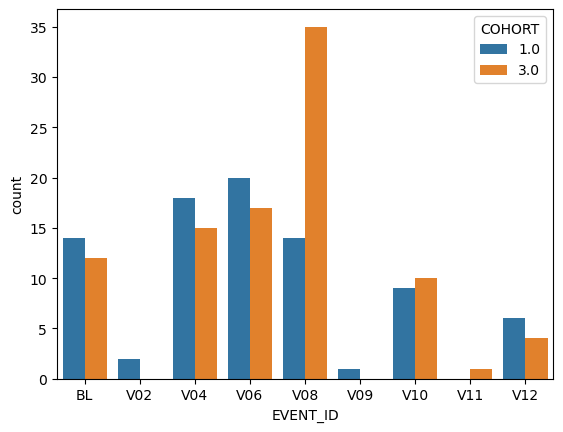

In [10]:
# Statistics of data

print("Nombre de personnes testées : {} et récupération de {} mesures".format(df_arm.shape[0], df_arm.shape[1]-4))
print("Nombre de Prodromal : {}".format(np.shape(np.where(df_arm['COHORT']==1))))
print("Nombre de personnes ayant Parkinson : {}".format(np.shape(np.where(df_arm['COHORT']==3))))


# Visualization of number in each cohort in total PPMI base
sns.countplot(data=df_arm, x="EVENT_ID", hue='COHORT', order=['BL', 'V02', 'V04', 'V06', 'V08', 'V09', 'V10', 'V11', 'V12'])
plt.show()

In [28]:
df_arm.shape

(192, 60)

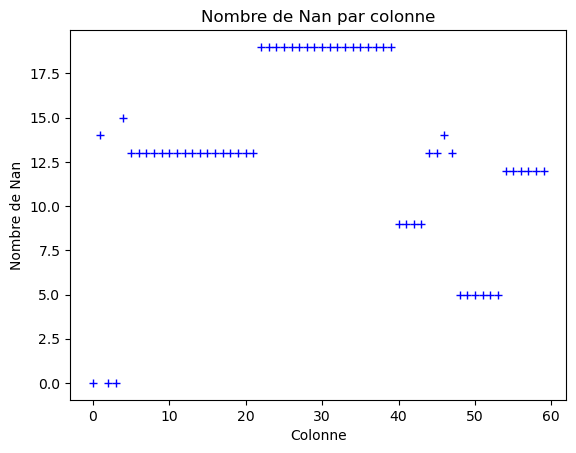

Moyenne de 13.05 Nan par colonne soit 6.8% 


In [11]:
# Nan
columns = df_arm.columns
for i, x in enumerate(df_arm[columns].isnull().sum()):
    #print('Number of Nan values pour {} : {}   soit {}% de la colonne'.format(columns[i], x, x*100/192))
    plt.plot(i, x, marker='+', color='blue')
plt.xlabel('Colonne')
plt.ylabel('Nombre de Nan')
plt.title('Nombre de Nan par colonne')
plt.show()
print('Moyenne de {} Nan par colonne soit {}% '.format(np.mean(df_arm[columns].isnull().sum()), round(np.mean(df_arm[columns].isnull().sum())*100/192,2)))

### <p style='font-size:25px;text-align:center;color:Blue'> Visualization of data<p> 

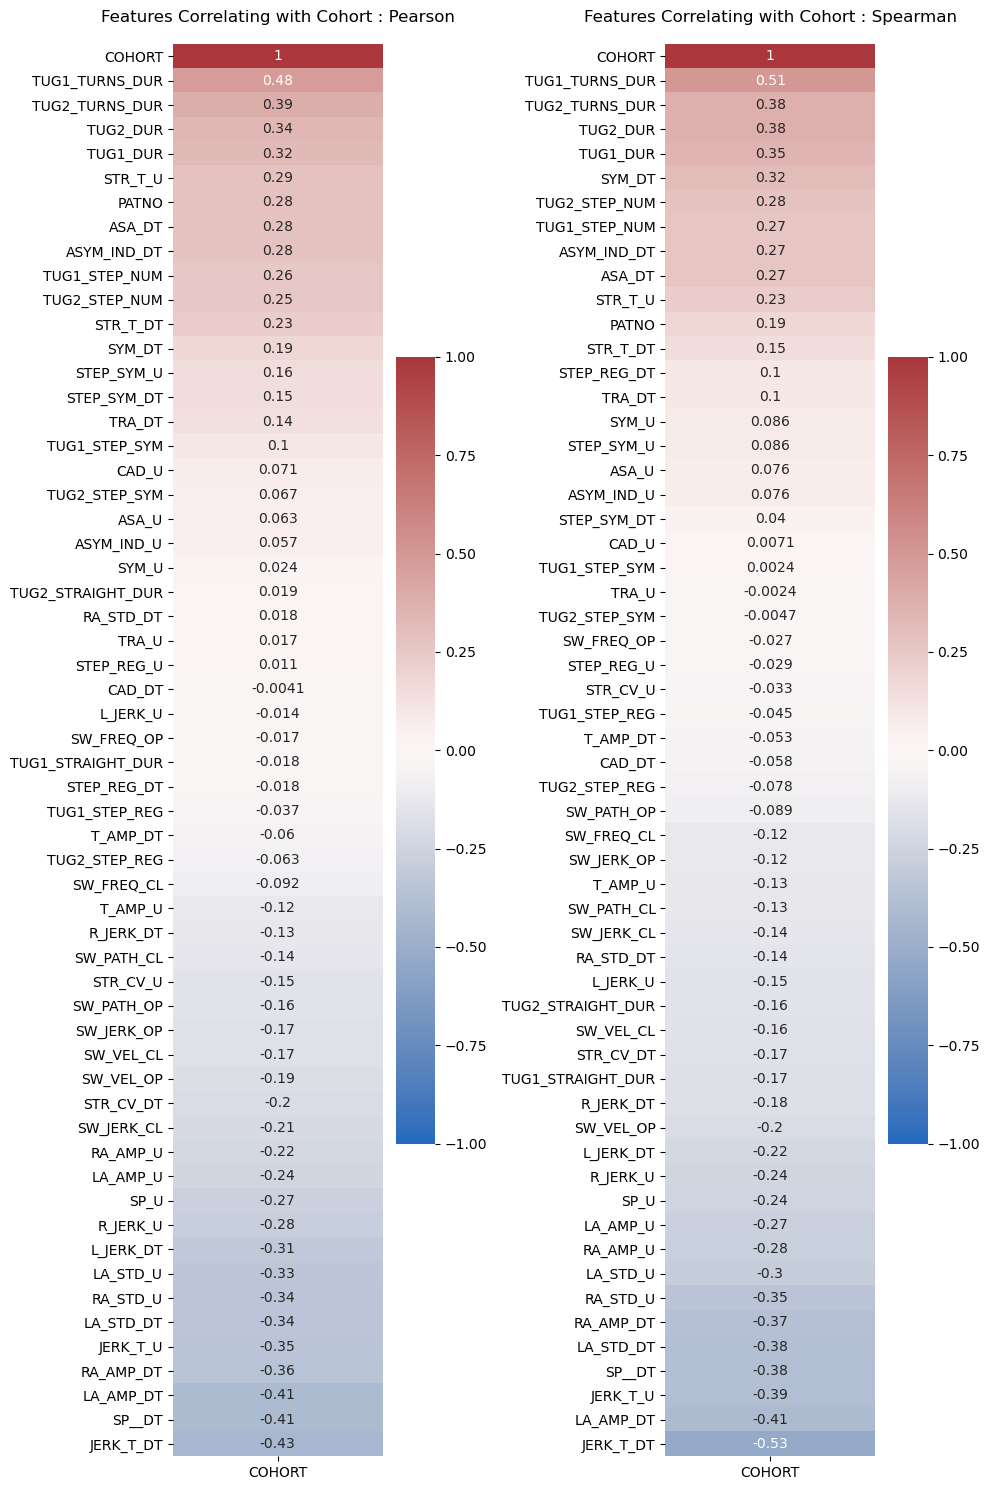

In [12]:
# Several correlations between the measures

corr_pearson = df_arm[4:60].corr(method='pearson')[['COHORT']].sort_values(by='COHORT', ascending=False)
corr_spearman = df_arm[4:60].corr(method='spearman')[['COHORT']].sort_values(by='COHORT', ascending=False)
fig, ax = plt.subplots(1,2, figsize=(10,15))
heatmap = sns.heatmap(corr_pearson, ax=ax[0], vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap = sns.heatmap(corr_spearman, ax=ax[1],vmin=-1, vmax=1, annot=True, cmap='vlag')
ax[0].set_title('Features Correlating with Cohort : Pearson', fontdict={'fontsize':12}, pad=16);
ax[1].set_title('Features Correlating with Cohort : Spearman', fontdict={'fontsize':12}, pad=16);
plt.tight_layout()
plt.show()

COHORT               0.000000
LA_AMP_DT            0.003117
RA_STD_U             0.004624
SW_PATH_CL           0.005537
SW_VEL_CL            0.006062
TUG2_TURNS_DUR       0.007607
TUG1_STEP_REG        0.007658
T_AMP_DT             0.007744
T_AMP_U              0.008264
ASYM_IND_DT          0.008392
SW_FREQ_OP           0.009716
TUG1_STEP_NUM        0.012540
ASA_DT               0.012829
ASA_U                0.013405
TUG2_STEP_REG        0.014878
RA_AMP_DT            0.015573
SW_VEL_OP            0.017218
ASYM_IND_U           0.019233
TRA_U                0.019277
TUG2_STEP_NUM        0.023242
TUG1_TURNS_DUR       0.023980
LA_AMP_U             0.025256
TUG1_DUR             0.027759
SP__DT               0.028463
SW_FREQ_CL           0.028761
STR_CV_DT            0.029723
SP_U                 0.030346
LA_STD_U             0.036818
LA_STD_DT            0.036945
TRA_DT               0.038399
STEP_REG_U           0.039837
JERK_T_U             0.040540
TUG2_DUR             0.041184
SW_JERK_OP

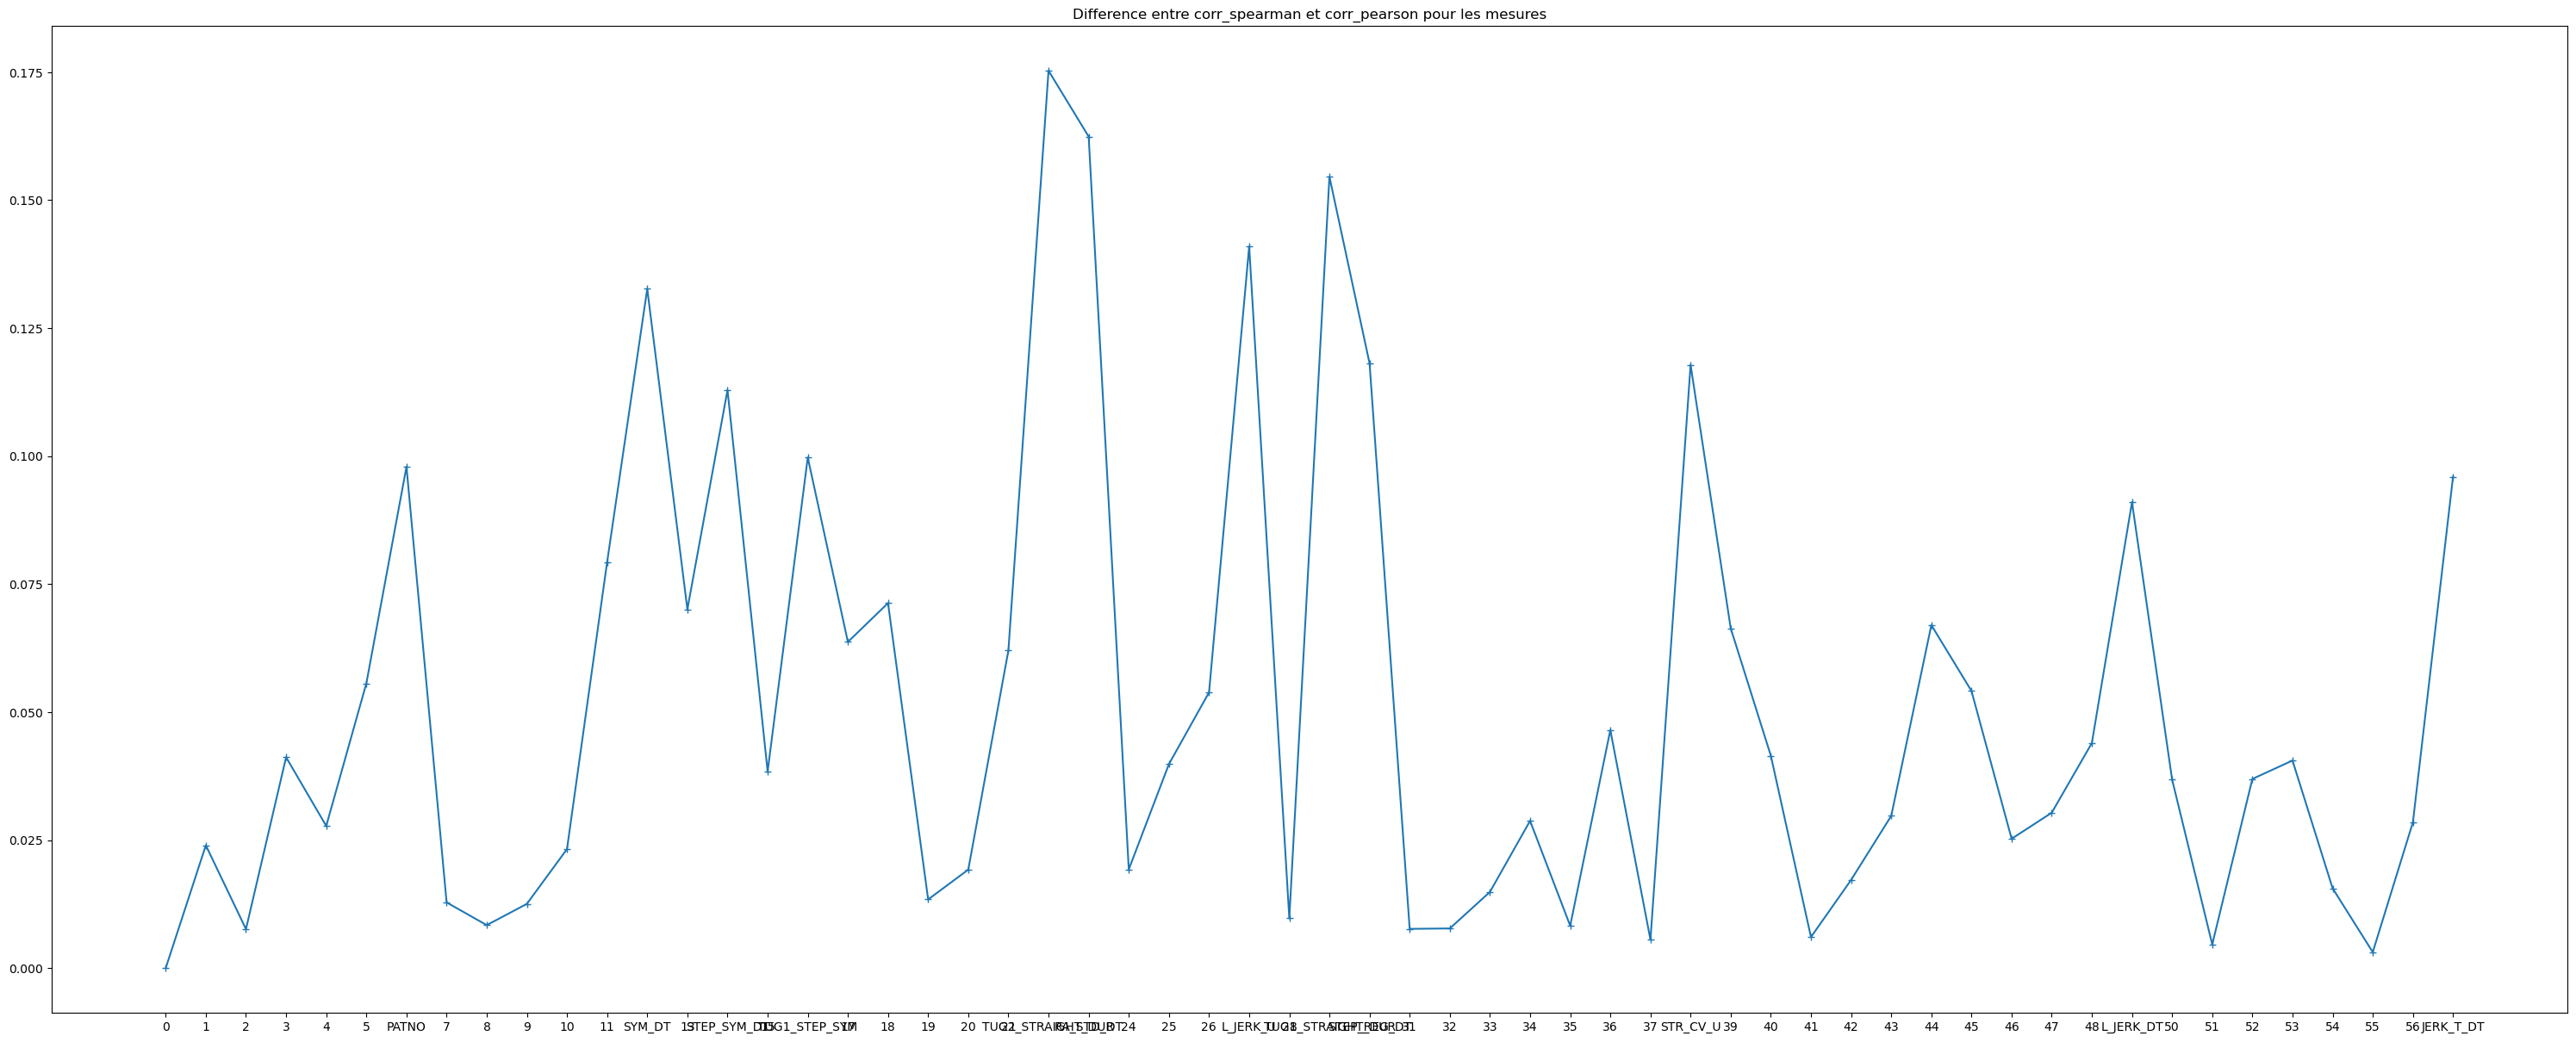

In [37]:
# Let see the differences
ecart = pd.Series(dtype='float64', index = list(corr_pearson.index), name='Ecart')
for x in list(corr_pearson.index):
    ecart.at[x] = corr_pearson.at[x,'COHORT'] - corr_spearman.at[x,'COHORT']
ecart = ecart.abs()
print(ecart.sort_values())
abscisse = [x if ecart[x]>=0.08 else i  for i,x in enumerate(ecart.index)]

# Print les différences avec val abs de ecart
fig = plt.figure(figsize=(30,12))
plt.plot(abscisse, ecart, marker='+')
plt.tight_layout()
plt.title('Difference entre corr_spearman et corr_pearson pour les mesures')
plt.show()

 ---
 #### Analyse
 
Pas de grosses différences de correlation entre les colonnes car max de differences de correlation de 0.175 pour TUG2_STRAIGHT_DUR

 ---

---
### <font color='green'> Méthodes imputation données manquantes </font>

---

L’imputation de données manquante réfère au fait qu’on remplace les valeurs manquantes dans le jeu de données par des valeurs artificielles. Idéalement, ces remplacements ne doivent pas conduire à une altération sensible de la distribution et la composition du jeu de données.

---

<font color='red'> **Type de missing value :**</font> MCAR/MAR/MNAR et univarié/monotone/arbitraire

---

<font color='red'>**Méthodes :** </font>

1. Analyse sans complétion :
      - Suppresion de données (éviter perte de données)
      - Méthodes tolérant les données manquantes comme CART/NIPALS/XGBoost (plus complexe et performante : arbre)


2. Imputation :
    - par règle
    - par mmoyenne ou mode (sensible aux valeurs abbérantes)
    - Hot Deck(val tirée au hasard parmi val existantes)/ par dernière valeur connu
    - KNN /Régression locale (LOESS) 
    - SVD (si bcp plus de données observées que manquantes)/ Complétion SVD (sinon) 
    - MissForest
    - Inférence bayésienne/Imputation multiple
    - Amelia II (mix algo EM et bootstrap (chaque tirage données estimées par bootstrap pour simuler incertitude puis algo EM pour trouver estimateur a posteriori (max de VRSBL)
    - LOCF missing value


#### Création d'un fichier exploitable pour Classif




    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    print(); print(model)
#Now we have predicted the output by passing X_test and also stored real target in expected_y.

    expected_y  = y_test
    predicted_y = model.predict(X_test)
#Here we have printed r2 score and mean squared log error for the Regressor.

    print(metrics.r2_score(expected_y, predicted_y))
    print(metrics.mean_squared_log_error(expected_y, predicted_y))

    plt.figure(figsize=(10,10))
    sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})


**Remarques:**
- *Analyse :*           
  Pour lr = 0.01 et max_depth=100 et num_iter=5000 classification acceptable avec accuracy de en moyenne 71%  


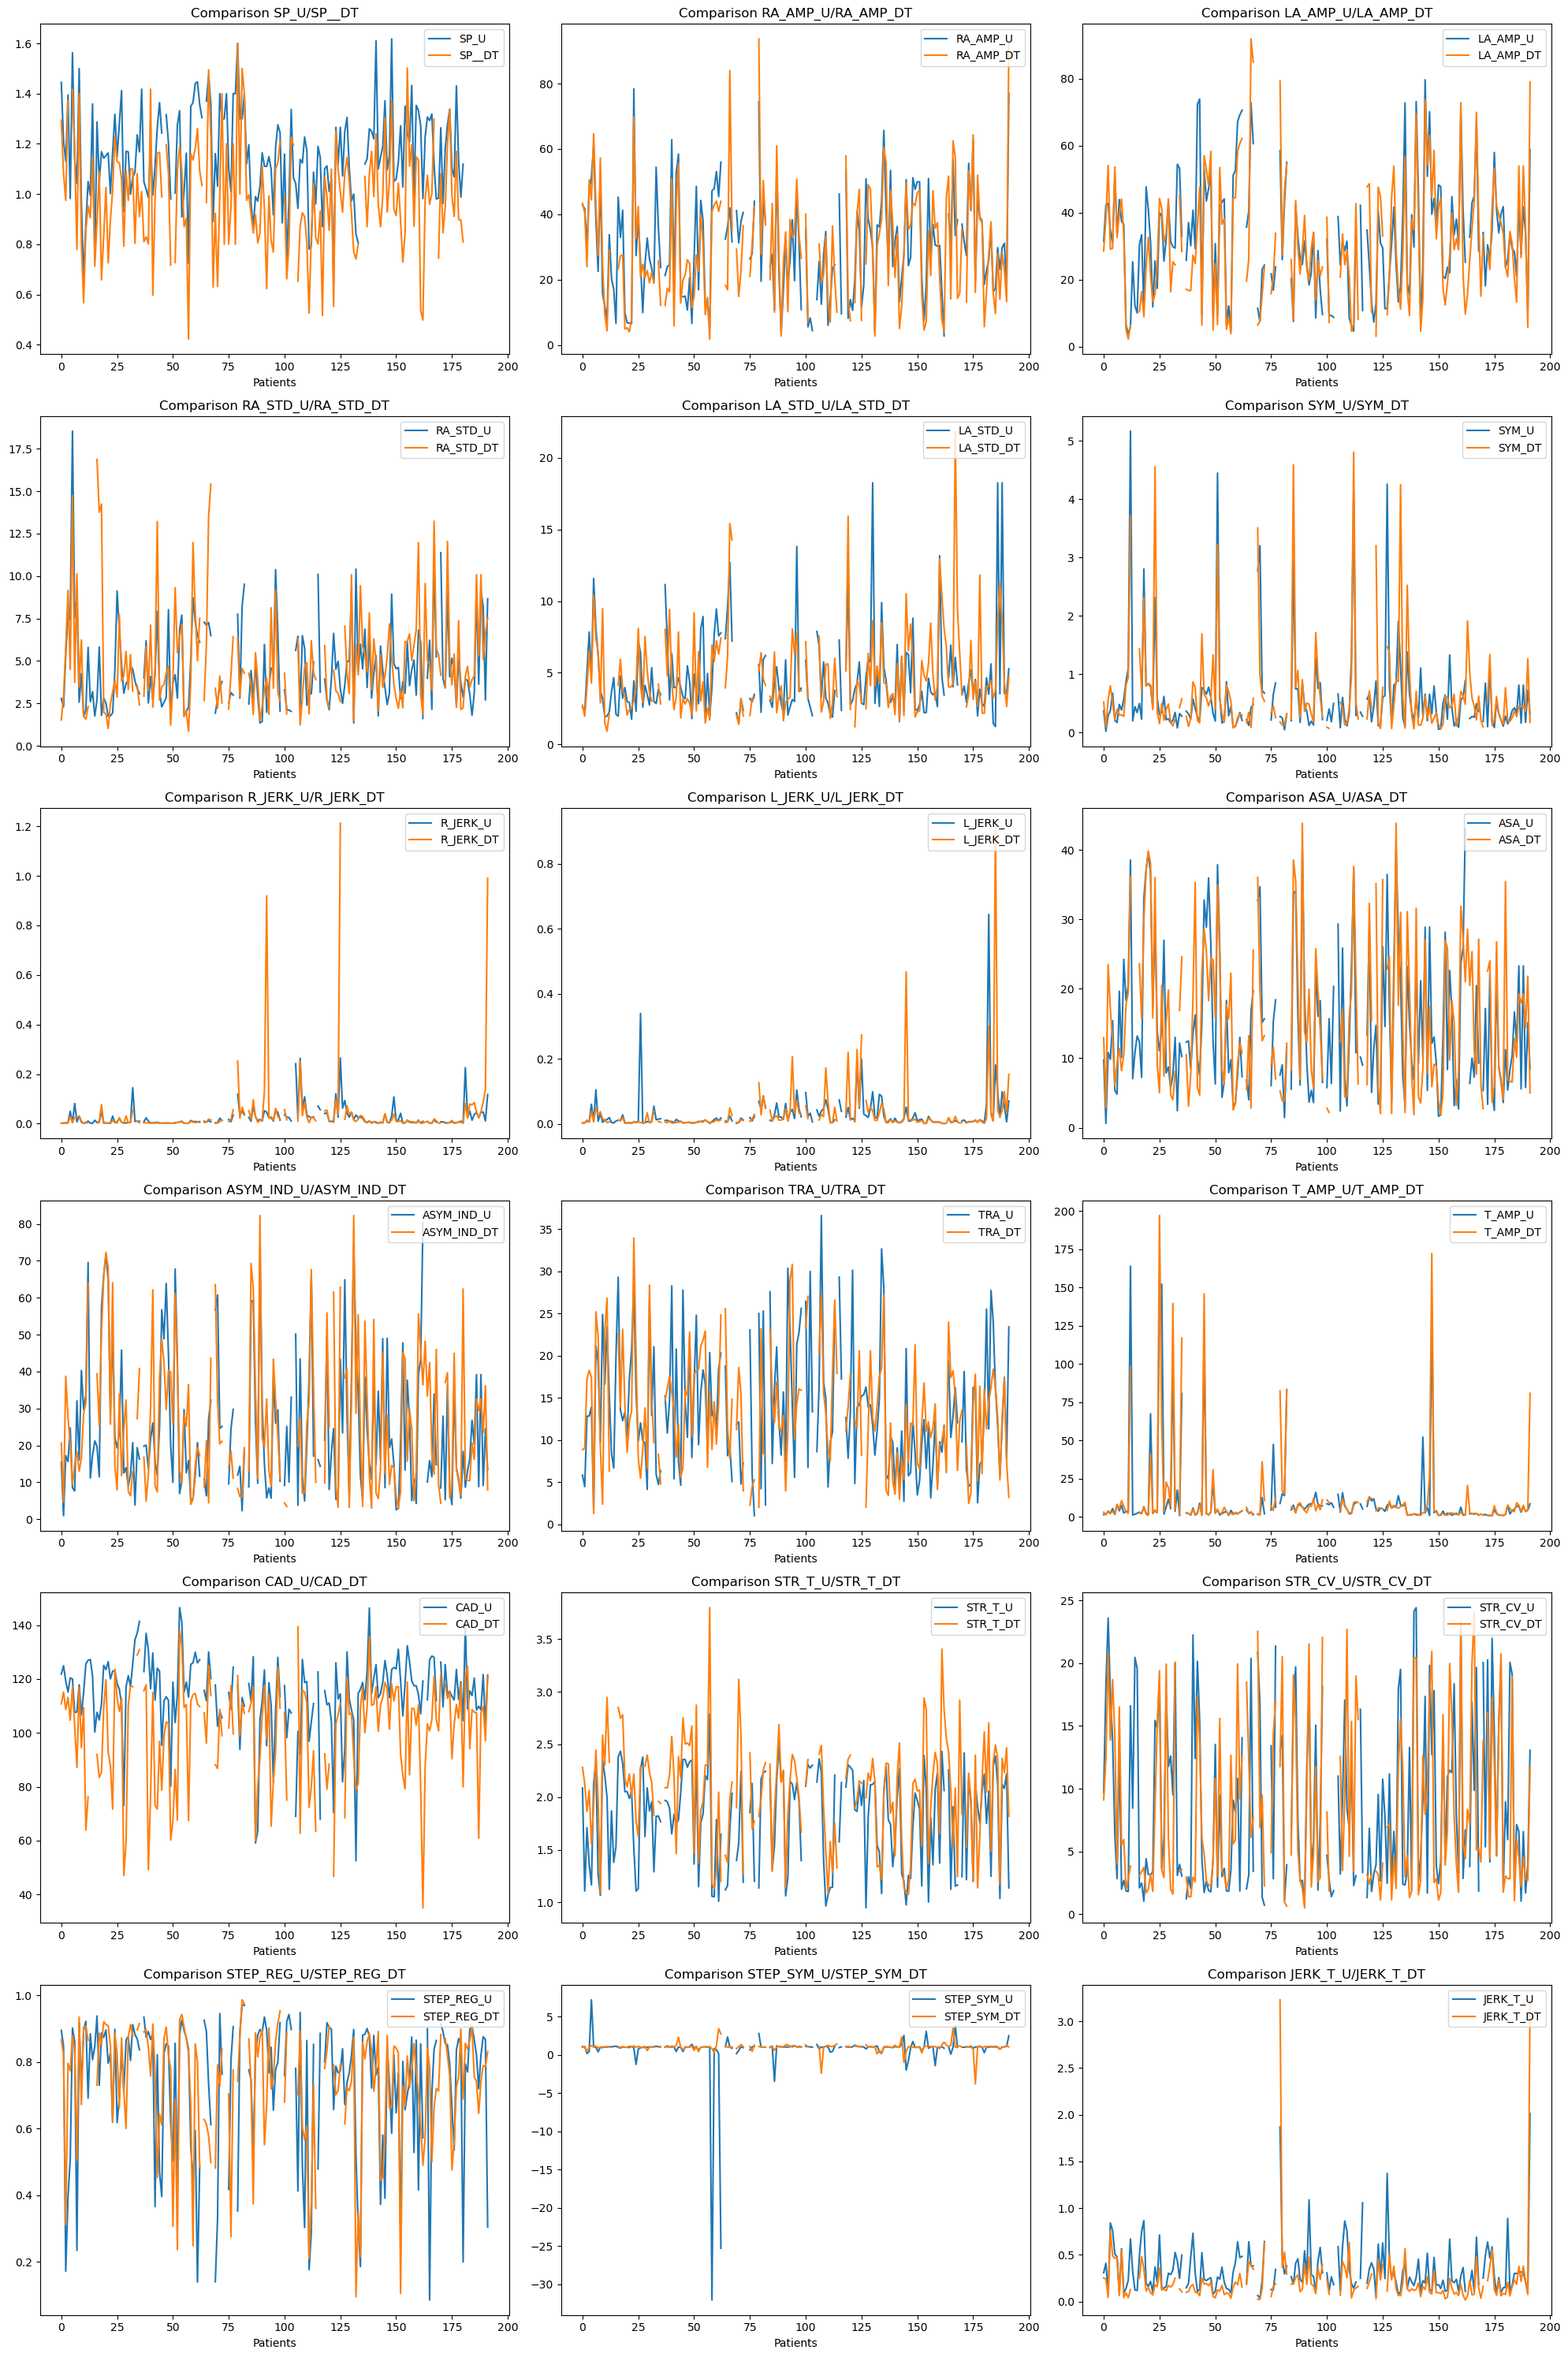

In [38]:
# First vizualisation of speed base walking and dual task walking
fig, ax = plt.subplots(6, 3, figsize = (20,30))
columns = data.columns
for i,ax in enumerate(ax.flat):
    #Columns i+4 pour commencer à plot SP_U
    ax.plot(np.arange(len(data['SP_U'])), np.array(data[columns[i+4]]), label = columns[i+4])
    #Columns i+22 pour commencer à plot SP_U_DT
    ax.plot(np.arange(len(data['SP_U'])), np.array(data[columns[i+22]]), label = columns[i+22])    
    ax.set_title('Comparison {}/{}'.format(columns[i+4],columns[i+22]))
    ax.legend(loc='upper right')
    ax.set_xlabel('Patients')
fig.tight_layout()
plt.show()

## <font color='#0000FF'> First classification method</font>

https://ieeexplore.ieee.org/document/9194627

R. Arefi Shirvan.et Al ont suggéré d'utiliser le classificateur des voisins les plus proches pour les données de la maladie de Parkinson. Cette technique est utilisée lorsqu'il existe un nombre réduit de caractéristiques qui ne suffisent pas à prédire la variable cible. Cette technique consiste à déterminer les k plus proches voisins et à les regrouper, créant ainsi des clusters. Ce processus a produit une précision de 93 % dans les prédictions, ce qui est remarquable dans la mesure où les données étaient insuffisantes. Dans leur cas, l'ensemble de données comprenait des données vocales provenant de 192 enregistrements effectués par 32 personnes. Les données vocales ont été utilisées comme mesure pour déterminer si le patient présentait ou non les symptômes de la maladie.

Le Dr R. Geetha Ramani et ses collaborateurs ont proposé une méthode de classification utilisant la régression logistique, l'analyse discriminante linéaire (LDA), les machines à vecteur de support (SVM) et le classificateur de forêt aléatoire. L'ensemble de données a été pris à partir du dépôt d'apprentissage automatique de l'UCI. Il se composait de 22 caractéristiques avec les enregistrements de 197 patients. L'algorithme de l'arbre aléatoire a atteint une précision de 100 %, tandis que le knn et le LDA ont atteint une précision supérieure à 90 %.

Arvind Kumar Tiwari a proposé dans son article une méthode utilisant un classificateur de forêt aléatoire sur un ensemble de données avec 20 caractéristiques. La précision obtenue en utilisant l'algorithme de sélection des caractéristiques était de 90,3 % avec une précision de 90,2 %. Le coefficient de corrélation était de 0,73 et la valeur roc obtenue était de 0,96. Cette méthode s'est avérée être la meilleure parmi d'autres en termes de précision de prédiction, comme le SVM, le perceptron multicouche et la méthode de l'arbre de décision.

Anchana Khemphila et al dans son article a utilisé le perceptron multicouche avec l'algorithme de propagation arrière afin de prédire les classes pour la maladie de Parkinson. L'ensemble de données sur la maladie de Parkinson provenant de l'uci machine learning repository a été utilisé. Le gain d'information a été utilisé pour filtrer les caractéristiques au lieu des données du patient. La précision de l'ensemble de données d'apprentissage était de 91,5 %, tandis que la précision de l'ensemble de données de validation était de 80 %.

Resul Das. Et Al ont utilisé quatre modèles de classification différents pour prédire la maladie de Parkinson. Les modèles utilisés étaient la régression, les réseaux neuronaux, l'arbre de décision et le Dmneural. Les performances de tous ces algorithmes ont été notées. Les réseaux neuronaux ont donné la meilleure précision. Les données de formation étaient de 65% et le reste a été donné pour le test. La précision obtenue par le réseau neuronal était de 92,9 %. L'algorithme BPNN a été utilisé dans le réseau neuronal avec une propagation directe unique et une seule couche cachée dans le réseau.

Mohammad S Islam.Et Al a utilisé différents classificateurs dans la prédiction. SVM, ANN feed-forward, algorithme d'arbre aléatoire ont été utilisés, et leurs résultats ont été analysés. Les données étaient constituées de plus de 190 échantillons de voix provenant de 30 patients différents. Il s'est avéré que l'algorithme ANN a donné une précision maximale de 97,5 %, tandis que les deux autres algorithmes ont donné une précision insuffisante qui ne convient pas aux applications de soins de santé.


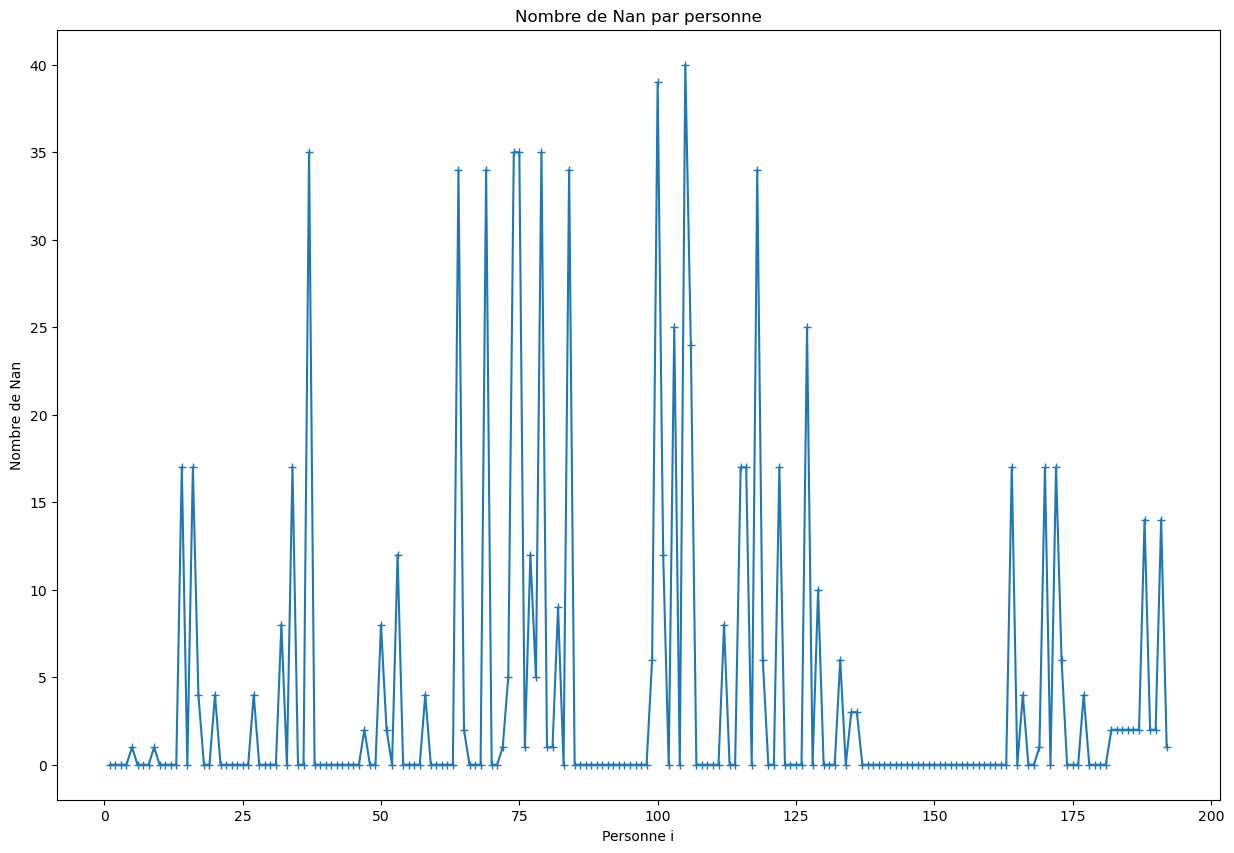

In [39]:
# Nombre de Nan pour chaque patient pour voir si grosses abérations pour certains patients
graph = []
threshold = []
for i,x in enumerate(list(df_arm.isna().sum(axis=1))):
    graph.append(x)
    if x>=10:
        threshold.append('Nan>=10')
    else:
        threshold.append('Nan<10')
fig = plt.figure(figsize=(15,10))
plt.plot(np.arange(1,len(graph)+1), graph, marker='+')
plt.xlabel('Personne i')
plt.ylabel('Nombre de Nan')
plt.title('Nombre de Nan par personne')
plt.show()

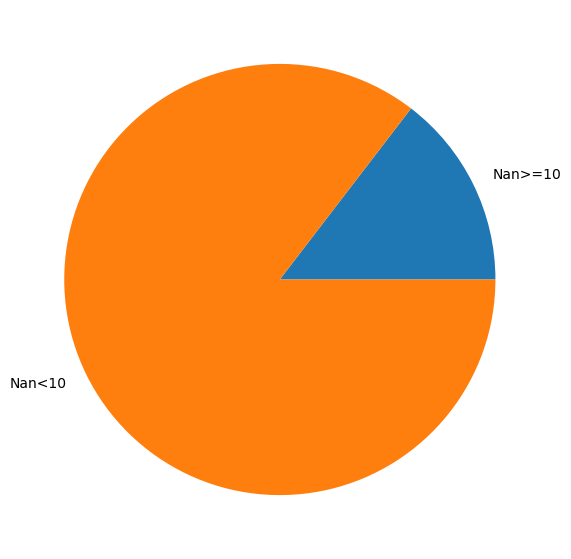

In [40]:
from collections import Counter
count = [Counter(threshold).get('Nan>=10'), Counter(threshold).get('Nan<10')]
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = ['Nan>=10', 'Nan<10'])
plt.title('')
plt.show()

In [12]:
# 1ère méthode pour combler Nan avec KNN

from sklearn.impute import KNNImputer 

imputer = KNNImputer(n_neighbors=3)
df_arm_full = imputer.fit_transform(df_arm.iloc[:,4:])
df_arm_full = pd.DataFrame(df_arm_full, columns=df_arm.iloc[:,4:].columns)
df_arm_full.head(40)

,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,ASYM_IND_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,0.001618,0.002542,9.754631,15.460948,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,0.002209,0.003016,0.612344,0.961927,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,0.002742,0.008316,10.824114,17.230208,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,0.003395,0.005928,9.854201,15.628248,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,0.049690,0.059845,15.409553,24.756537,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053
5,1.563,61.052068,51.465144,18.543469,11.587096,0.207511,0.004151,0.006683,5.367299,8.527529,...,0.585938,1.296875,0.615345,1.256410,9.398438,10.333984,0.578125,1.128906,0.639181,1.080505
6,1.143,38.314673,33.248165,7.560887,8.128498,0.168624,0.081082,0.104493,4.843285,7.631833,...,0.625000,1.437500,0.381887,0.737591,7.562500,6.070312,0.609375,1.269531,0.491730,0.733162
7,1.042,22.526788,43.909882,8.733026,6.224986,0.479479,0.007078,0.007961,19.653523,32.064875,...,0.625000,2.820312,0.411788,1.137831,13.687500,12.632812,0.609375,2.761719,0.656651,1.349639
8,1.500,51.613331,37.382977,2.566866,3.752649,0.383879,0.030677,0.030634,10.120941,16.041298,...,0.625000,2.507812,0.503161,0.854427,9.640625,7.667969,0.656250,2.210938,0.762715,1.158379
9,0.964,15.610665,36.560067,4.258304,3.149224,0.569155,0.005900,0.004559,24.238172,40.296854,...,0.617188,2.472656,0.527426,2.056776,11.101562,8.835938,0.585938,2.457031,0.484080,1.557265


## <p style='font-size:30px;text-align:center;color:Cyan'>Random Forest<p>
<center><img src="images/random_forest.jpg"></center>

#### <p style='font-size:20px;text-align:center;color:DarkBlue'>Travail recherche du meilleur set d'hyperparamètres<p>

Trouver le meilleur set d'hyperparamètre mais sans faire d'overfitting :
- <p style='color:green'>CrossValidation<p> 
    
Demande en calcul enorme car pour chaque set d'hyperparamètre il faut tester K-Fold CV  =>  Nombre d'execution de l'algo = (nbre_set*K) :  
- <p style='color:green'> Faire un premier balayage Random généralisé sur les set d'hyperparamètre les plus performant + comparer avec set de base<p>
- <p style='color:green'> Puis effectuer un recherche plus précise avec une grille sur le set random le plus précis précédent + comparer avec set de base<p>
- <p style='color:green'> Enfin, tableau récapitulatif des performances<p>


---
**RF avec paramètres de base pour référence**

---

In [75]:
# 1- Random Forest avec sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pprint import pprint

x_train, x_test, y_train, y_test = train_test_split(df_arm_full, df_arm['COHORT'], test_size=0.2)
classif = RandomForestClassifier(n_estimators = 10)

print('Base Parameters utilisés :')
pprint(classif.get_params())
classif.fit(x_train, y_train)

# Remarque : If None, then nodes are expanded until all leaves are pure or until all leaves contain
# less than min_samples_split samples.

Base Parameters utilisés :
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


RandomForestClassifier(n_estimators=10)

In [13]:
# Accuracy de la prédiction
from sklearn import metrics
def comp(model, x_test, y_test, title):
    pred = model.predict(x_test)
    if title.count('Neural')>0:
        pred = [1 if p>0.5 else 0 for p in pred]
    print(title+ ' :')
    # Accuracy
    print("Accuracy : ", metrics.accuracy_score(y_test, pred))
    # Matrice de confusion
    conf = metrics.confusion_matrix(y_test, pred)
    normalisation = conf/conf.sum(axis=1)[:, np.newaxis]
    sns.heatmap(normalisation, annot=True, cmap='vlag')
    plt.xticks(np.arange(2)+0.5, ['Parkisons Disease', 'Podromal'], rotation=25)
    plt.yticks(np.arange(2)+0.5, ['Parkisons Disease', 'Podromal'], rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Matrice de confusion : ')
    plt.show()
    # Rapport
    print("Rapport :\n{}".format(metrics.classification_report(y_test, pred)))

---
**Analyse plus fine des paramètres**

---

In [73]:
# 1er balayage sur large éventail de sets d'hyperparamètres avec RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Combinaison des classifications d'ensembles d'entraînement générés aléatoirement
bootstrap = [True, False]

# Profondeur max de l'arbre
max_depth = np.linspace(10, 100, num = 10).tolist()

# Number of features to consider when looking for the best split, sqrt=auto, essayer None aussi?
max_features = ['auto', 'sqrt', 'log2']

#the minimum number of samples required to split an internal node,
min_samples_split = [2, 5, 10, 20]

# min_samples_leaf specifies the minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 4]

# Nombre d'arbres dans forêt aléatoire
n_estimators = np.linspace(10, 200, num = 20, dtype = "int64").tolist()

grille = {'bootstrap':bootstrap,
          'max_depth':max_depth,
          'max_features':max_features,
          'min_samples_leaf':min_samples_leaf,
          'min_samples_split':min_samples_split,
          'n_estimators':n_estimators}

# Choix aléatoire parmi 2*10*3*4*3*20=14400 combinaisons de paramètres possibles

In [45]:
# Random Search CV training

rfc = RandomForestClassifier()
# 100 combinaisons et K = 5 folds
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = grille, n_iter = 100, cv = 5, n_jobs = -1)
rfc_random.fit(x_train, y_train)
rfc_random.best_params_

{'n_estimators': 160,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50.0,
 'bootstrap': True}

---
Comparison to the base model

---

|Parameters|Base Model|Random Search Model|
|:----|:----:|----:|
|n_estimators |10| 160|
|min_samples_split |2| 10|
|min_samples_leaf |1| 2|
|max_features |auto|sqrt|
|max_depth |None|50.0|
|bootstrap |True|True|

In [72]:
# Comparaison
base_rf = classif
best_random_rf = RandomForestClassifier(n_estimators = 150, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 50, bootstrap = True).fit(x_train, y_train)
comp(base_rf, x_test, y_test, 'Base rf')
comp(best_random_rf, x_test, y_test, 'Meilleur random rf')


NameError: name 'classif' is not defined

In [48]:
# Plus précis autour des meilleurs paramètres random -> 576 sets

best_grille = {
    'bootstrap' : [True],
    'max_depth' : [40, 50, 60, 70, 80, 90],
    'max_features': ['sqrt', 'log2'], 
    'min_samples_leaf': [1, 2],
    'min_samples_split': [1, 5, 10, 20],
    'n_estimators' : [150, 160, 170, 180, 190, 200]
}

In [49]:
# Best Search CV training
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

# 100 combinaisons et K = 5 folds
rfc_best = GridSearchCV(estimator = rfc, param_grid = best_grille, cv = 5, n_jobs = -1)
rfc_best.fit(x_train, y_train)
rfc_best.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 160}

Best rf :
Accuracy :  0.8461538461538461


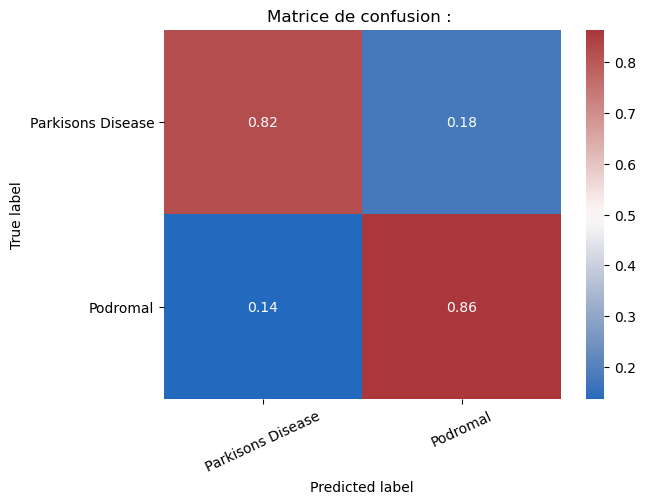

Rapport :
              precision    recall  f1-score   support

         1.0       0.82      0.82      0.82        17
         3.0       0.86      0.86      0.86        22

    accuracy                           0.85        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.85      0.85      0.85        39



In [76]:
base_rf = classif
best_rf = RandomForestClassifier(n_estimators = 160, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 60, bootstrap = True).fit(x_train, y_train)
comp(best_rf, x_test, y_test, 'Best rf')

## <p style='font-size:30px;text-align:center;color:Cyan'>XGBoost<p>
<center><img src="images/xgboost.jpg"></center>

---

TODO : 
    
0. faire random forest avec pipeline standardscaler
1. faire grille et evaluation des meilleurs hyperparamètres
2. voir si avec imputation KNN ou sans mieux ?
3. Bons hyperparamètres par defaut pour odele de base??

#### <p style='font-size:20px;text-align:center;color:DarkBlue'>Recherche des meilleurs Hyperparamètres<p>
<center><img src='images/xgboost_par.jpg'></center>

---
#### Première approche avec initialisation basique qui sert de référence

---

In [59]:
print(x_train.shape, df_arm_full.shape, df_arm['COHORT'].shape)

(153, 56) (192, 56) (192,)


In [20]:
import xgboost as xgb
from sklearn import metrics
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(df_arm_full, df_arm['COHORT'], test_size=0.2)
xgbc = xgb.XGBClassifier(eval_metric='mlogloss')
pipeline = Pipeline([('scaler', StandardScaler()), ('classifieur', xgbc)])
xgbc.fit(x_train, y_train)
print('Base Parameters utilisés :')
pprint(xgbc.get_params())

Base Parameters utilisés :
{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}


Base XGBC :
Accuracy :  0.717948717948718


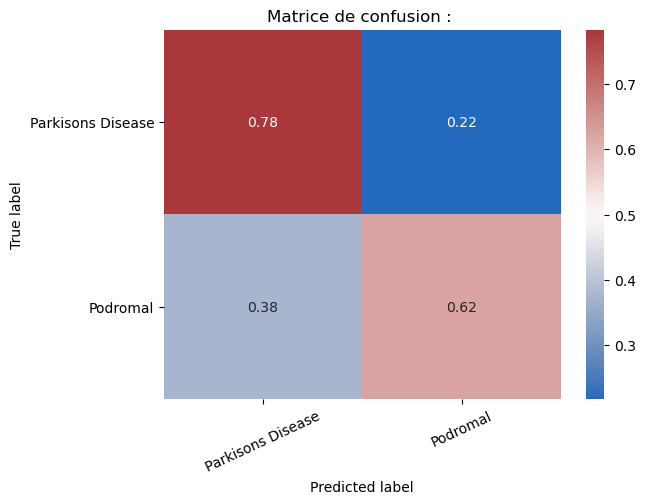

Rapport :
              precision    recall  f1-score   support

         1.0       0.75      0.78      0.77        23
         3.0       0.67      0.62      0.65        16

    accuracy                           0.72        39
   macro avg       0.71      0.70      0.71        39
weighted avg       0.72      0.72      0.72        39

K-fold Cross Validation vaut en moyenne: 0.71


In [21]:
from sklearn import model_selection as ms
comp(xgbc, x_test, y_test, 'Base XGBC')
kf = ms.KFold(n_splits=5, shuffle=True)
kf_scores = ms.cross_val_score(xgbc, x_train, y_train, cv=kf)
print("K-fold Cross Validation vaut en moyenne: {:.2f}".format(kf_scores.mean()))

---
**Analyse plus fine des paramètres**

---

In [30]:
# 1er balayage sur large éventail de sets d'hyperparamètres avec RandomizedSearchCV

grille_xgb = { 
        'learning_rate': [0.05, 0.1, 0.3, 0.7],
        'n_estimators':[50, 200, 500, 1000, 1500],
        'max_depth': [i for i in range(3,20,2)],
        'lambda': [1],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.01, 0.1, 0.5, 1],
        'subsample': [0.1, 0.5, 1, 5],
        'colsample_bytree': [0.05, 0.1, 0.5, 1],
        'max_depth': [2, 5, 10, 20]
    }

# Choix aléatoire parmi 4*4*9*1*3*4*4*4*4=110592 combinaisons de paramètres possibles

In [32]:
# Random Search CV training

# 500 combinaisons et K = 5 folds
xgbc_random = RandomizedSearchCV(estimator = xgbc, param_distributions = grille_xgb, n_iter = 100, cv = 5, n_jobs = -1)
xgbc_random.fit(x_train, y_train)
xgbc_random.best_params_

/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'subsample': 0.5,
 'n_estimators': 1500,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.05,
 'lambda': 1,
 'gamma': 0.01,
 'colsample_bytree': 0.05}

Best Random XGBC :
Accuracy :  0.7948717948717948


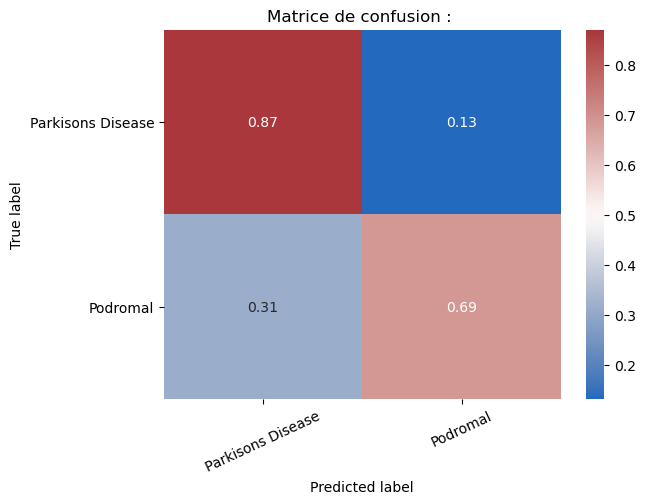

Rapport :
              precision    recall  f1-score   support

         1.0       0.80      0.87      0.83        23
         3.0       0.79      0.69      0.73        16

    accuracy                           0.79        39
   macro avg       0.79      0.78      0.78        39
weighted avg       0.79      0.79      0.79        39

K-fold Cross Validation vaut en moyenne: 0.71


In [22]:
from sklearn import model_selection as ms
xgbc_rand = xgb.XGBClassifier(
    subsample = 0.5,
    n_estimators = 1500,
    min_child_weight = 1,
    max_depth = 10,
    learning_rate = 0.05,
    gamma = 0.01,
    colsample_bytree = 0.05,
    eval_metric='mlogloss'
    )


xgbc_rand.fit(x_train, y_train)
comp(xgbc_rand, x_test, y_test, 'Best Random XGBC')
kf = ms.KFold(n_splits=5, shuffle=True)
kf_scores = ms.cross_val_score(xgbc_rand, x_train, y_train, cv=kf)
print("K-fold Cross Validation vaut en moyenne: {:.2f}".format(kf_scores.mean()))

500 combinaisons et K=5folds:
{'subsample': 1,
 'n_estimators': 1000,
 'min_child_weight': 1,
 'max_depth': 2,
 'learning_rate': 0.7,
 'lambda': 1,
 'gamma': 1,
 'colsample_bytree': 0.1}

In [42]:
best_grille_xgb = { 
        'learning_rate': [0.5, 0.7, 0.9],
        'n_estimators':[100, 200, 300, 400, 500],
        'max_depth': [8, 10, 12],
        'lambda': [1],
        'min_child_weight': [8, 10, 12],
        'gamma': [0.01, 0.05],
        'subsample': [0.8, 1, 2],
        'colsample_bytree': [0.01, 0.03],
        'max_depth': [8, 10, 12]
    }

In [27]:
# Best Search CV training
from sklearn.model_selection import GridSearchCV

# K = 5 folds
xgbc_best = GridSearchCV(estimator = xgbc, param_grid = best_grille_xgb, cv = 5, n_jobs = -1)
xgbc_best.fit(x_train, y_train)
xgbc_best.best_params_

/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'colsample_bytree': 0.01,
 'gamma': 0.01,
 'lambda': 1,
 'learning_rate': 0.5,
 'max_depth': 8,
 'min_child_weight': 8,
 'n_estimators': 400,
 'subsample': 0.8}

Best XGBC :
Accuracy :  0.7948717948717948


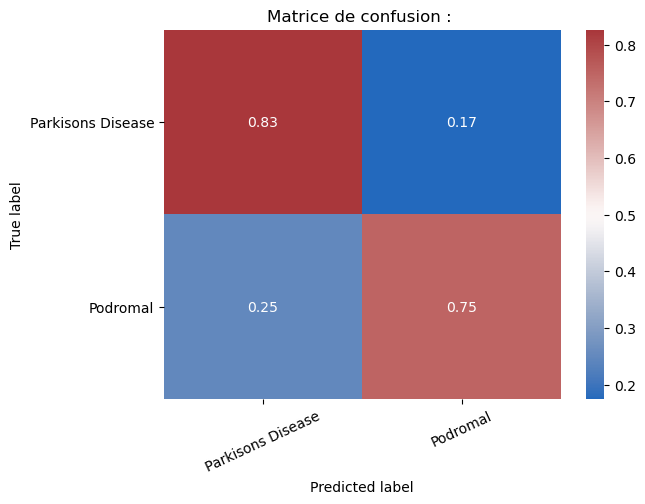

Rapport :
              precision    recall  f1-score   support

         1.0       0.83      0.83      0.83        23
         3.0       0.75      0.75      0.75        16

    accuracy                           0.79        39
   macro avg       0.79      0.79      0.79        39
weighted avg       0.79      0.79      0.79        39

K-fold Cross Validation vaut en moyenne: 0.66


In [23]:
from sklearn import model_selection as ms
xgbc_best = xgb.XGBClassifier(
    subsample = 0.8,
    n_estimators = 400,
    min_child_weight = 8,
    max_depth = 8,
    learning_rate = 0.5,
    gamma = 0.01,
    colsample_bytree = 0.01,
    eval_metric='mlogloss')

xgbc_best.fit(x_train, y_train)
comp(xgbc_best, x_test, y_test, 'Best XGBC')
kf = ms.KFold(n_splits=5, shuffle=True)
kf_scores = ms.cross_val_score(xgbc_best, x_train, y_train, cv=kf)
print("K-fold Cross Validation vaut en moyenne: {:.2f}".format(kf_scores.mean()))

---

L'accuracy est meilleure pour la base que pour best_random et best mais le score de la cross validation avec 5-folds est meilleur pour le best>best_random>base xgbc.

---

## <p style='font-size:30px;text-align:center;color:Cyan'>Neural Network Classifier<p>
<center><img src="images/NN.jpg"></center>

---

<center><img src="images/hyperpara_nn.png"></center>

---
There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer.

Moreover, the number of neurons and number layers required for the hidden layer also depends upon training cases, amount of outliers, the complexity of, data that is to be learned, and the type of activation functions used.

Most of the problems can be solved by using a single hidden layer with the number of neurons equal to the mean of the input and output layer. If less number of neurons is chosen it will lead to underfitting and high statistical bias. Whereas if we choose too many neurons it may lead to overfitting, high variance, and increases the time it takes to train the network.

In [14]:
from sklearn.preprocessing import StandardScaler

#same x_train, x_test, y_train, y_test as xgboost
x_train, x_test, y_train, y_test = train_test_split(df_arm_full, df_arm['COHORT'], test_size=0.3)
y_train = y_train.replace(1,0).replace(3,1)
y_test = y_test.replace(1,0).replace(3,1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# 0: prodomal et 1:pd

In [36]:
print(y_train.shape)
print(x_train.shape)

(134,)
(134, 56)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Flatten

# Construction of Neural Network
model_nn = Sequential()
model_nn.add(Dense(40, input_dim = 56, activation='relu'))
model_nn.add(Dropout(0.1))
model_nn.add(Dense(20, input_dim = 48, activation='relu'))
model_nn.add(Dropout(0.1))
model_nn.add(Dense(1, input_dim = 24, activation='sigmoid'))
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 40)                2280      
_________________________________________________________________
dropout_4 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 3,121
Trainable params: 3,121
Non-trainable params: 0
_________________________________________________________________


--- 
Performance avec Stratified 5-folds

In [24]:
model_nn.fit(x=x_train_scaled, y=y_train, epochs = 150, verbose = 1)

Epoch 1/150
5/5 [==============================] - 0s 3ms/step - loss: 0.7541 - accuracy: 0.5000
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.5522
Epoch 3/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5746
Epoch 4/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.6119
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.6418
Epoch 6/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6180 - accuracy: 0.6642
Epoch 7/150
5/5 [==============================] - 0s 5ms/step - loss: 0.5858 - accuracy: 0.6716
Epoch 8/150
5/5 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7239
Epoch 9/150
5/5 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.6716
Epoch 10/150
5/5 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.7164
Epoch 11/150
5/5 [===========

Fully connected Neural Network :
Accuracy :  0.8275862068965517


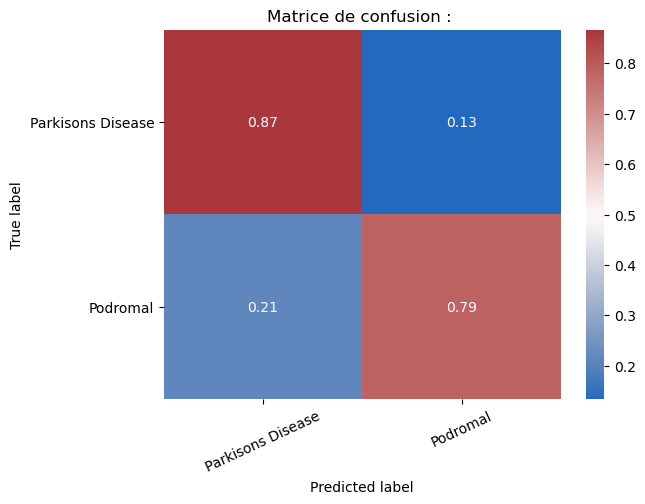

Rapport :
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        30
         1.0       0.85      0.79      0.81        28

    accuracy                           0.83        58
   macro avg       0.83      0.83      0.83        58
weighted avg       0.83      0.83      0.83        58



In [25]:
comp(model_nn, x_test_scaled, y_test, 'Fully connected Neural Network')

In [26]:
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def built_nn():
    model_nn = Sequential()
    model_nn.add(Dense(60, input_dim = 56, activation='relu'))
    model_nn.add(Dropout(0.1))
    model_nn.add(Dense(30, input_dim = 48, activation='relu'))
    model_nn.add(Dropout(0.1))
    model_nn.add(Dense(1, input_dim = 24, activation='sigmoid'))
    model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_nn
    
est_nn = KerasClassifier(build_fn=built_nn, batch_size=1, epochs=150, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores = cross_val_score(est_nn, x_train_scaled, y_train, cv=kfold)
print("Baseline: {:2f}% ({:2f}%)".format(cv_scores.mean()*100, cv_scores.std()*100))

Baseline: 70.227920% (8.261126%)


Précision élevée mais CV nulle à chier overfitting??

## <p style='font-size:30px;text-align:center;color:Cyan'>XAI<p>
<center><img src="images/XAI.png"></center>

---

<p style='color:#8e44ad ;font-size:20px;text-align:20px'>First test with SHAP :<p>
It stands for SHapley Additive exPlanations. This method aims to explain the prediction of an instance/observation by computing the contribution of each feature to the prediction.